In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
IV=df.drop('charges',axis=1)
DV=df.charges


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(IV,DV, random_state=0,test_size=.20 )

In [5]:
X_train.drop_duplicates(inplace=True)
X_train.dropna(inplace=True)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 621 to 684
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1067 non-null   int64  
 1   sex       1067 non-null   object 
 2   bmi       1067 non-null   float64
 3   children  1067 non-null   int64  
 4   smoker    1067 non-null   object 
 5   region    1067 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.4+ KB


In [7]:
X_train_N=X_train.select_dtypes(exclude='object')
X_train_N_C = X_train_N.columns

In [8]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
normali=StandardScaler()

In [9]:
X_train_N = pd.DataFrame(normali.fit_transform(X_train_N))
X_train_N.set_index(X_train.index, inplace = True)
X_train_N.columns = X_train_N_C

In [10]:
X_train_N= X_train_N[(np.abs(stats.zscore(X_train_N)) < 2.5).all(axis = 1)]

In [11]:
X_train_C=X_train.select_dtypes(include='object')

In [12]:
from sklearn.preprocessing import LabelBinarizer
sex = LabelBinarizer()
smoker= LabelBinarizer()
region = LabelBinarizer()
X_train_C.sex = sex.fit_transform(X_train_C.sex)
X_train_C.smoker = smoker.fit_transform(X_train_C.smoker)
X_train_C.region = smoker.fit_transform(X_train_C.region)

In [13]:
X_train_F=pd.merge(X_train_C,X_train_N,left_index=True,right_index=True)

In [14]:
y_train= np.log(y_train)

In [15]:
y_train = y_train.loc[X_train_F.index]

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_F, y_train)
y_h_train= model.predict(X_train_F)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
RMS=np.sqrt(mean_squared_error(y_train,y_h_train))
R2=r2_score(y_train,y_h_train)
print('Root mean Square Error is' ,RMS)
print('R^2 is',R2)


Root mean Square Error is 0.4461138153756393
R^2 is 0.765982377697275


Text(0.5, 1.0, 'Check for linearity')

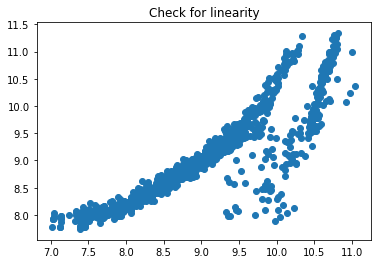

In [18]:
plt.scatter(y_train,y_h_train)
plt.title('Check for linearity')

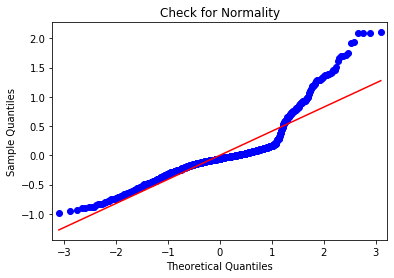

In [19]:
import statsmodels.api as sm
import pylab as py
residual=y_train-y_h_train
sm.qqplot(residual,line='r')
py.title('Check for Normality')
py.show()

Text(0.5, 1.0, 'Check for Homoscedasticity')

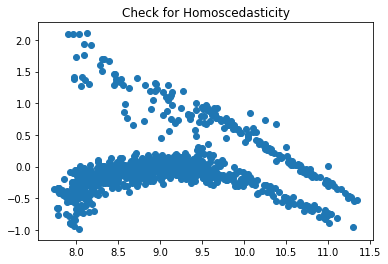

In [20]:
plt.scatter(y_h_train, residual)
plt.title('Check for Homoscedasticity')